<a href="https://colab.research.google.com/github/alcorama/Repo1/blob/main/AI_%D0%BC%D0%B0%D1%80%D0%B0%D1%84%D0%BE%D0%BD_%D0%94%D0%B5%D0%BD%D1%8C_2_9_%D0%B8%D1%8E%D0%BB%D1%8F_%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_Tg_%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE_%D1%81%D0%BE%D1%82%D1%80%D1%83%D0%B4%D0%BD%D0%B8%D0%BA%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Марафон 09-07 Телеграм-боты**

In [ ]:
#@title Установка библиотек и ввод токена бота и функции запуска ботов
!pip install python-telegram-bot==13.7

from IPython.display import clear_output
from telegram import Update, InlineKeyboardButton, InlineKeyboardMarkup, ReplyKeyboardMarkup, KeyboardButton
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackQueryHandler, CallbackContext
from getpass import getpass
import threading
import time

# Запрашиваем у пользователя ввод токена API в засекреченном виде
API_TOKEN = getpass('Введите токен вашего Telegram бота: ')
clear_output()

# Функция для запуска эхо-бота
def run_echo_bot():
    # Флаг для остановки бота
    global is_running
    is_running = True

    # Запускаем бота в отдельном потоке
    bot_thread = threading.Thread(target=main)
    bot_thread.start()

    # Цикл для остановки выполнения ячейки после команды /stop
    while is_running:
        time.sleep(1)

    # Ждем завершения потока бота
    bot_thread.join()

# Функция для запуска бота, определяющего тип данных
def run_data_type_bot():
    # Флаг для остановки бота
    global is_running
    is_running = True

    # Запускаем бота в отдельном потоке
    bot_thread = threading.Thread(target=main)
    bot_thread.start()

    # Цикл для остановки выполнения ячейки после команды /stop
    while is_running:
        time.sleep(1)

    # Ждем завершения потока бота
    bot_thread.join()

# Функция для запуска бота с инлайн-кнопками
def run_inline_button_bot():
    # Флаг для остановки бота
    global is_running
    is_running = True

    # Запускаем бота в отдельном потоке
    bot_thread = threading.Thread(target=main)
    bot_thread.start()

    # Цикл для остановки выполнения ячейки после команды /stop
    while is_running:
        time.sleep(1)

    # Ждем завершения потока бота
    bot_thread.join()

# Функция для запуска бота с reply-кнопками
def run_reply_button_bot():
    # Флаг для остановки бота
    global is_running
    is_running = True

    # Запускаем бота в отдельном потоке
    bot_thread = threading.Thread(target=main)
    bot_thread.start()

    # Цикл для остановки выполнения ячейки после команды /stop
    while is_running:
        time.sleep(1)

    # Ждем завершения потока бота
    bot_thread.join()

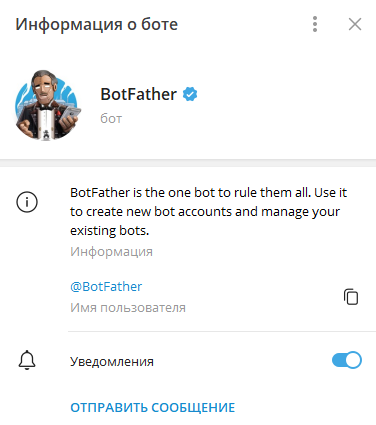

## **1. Создание бота в Telegram**

1. Откройте Telegram и найдите @BotFather.
2. Начните диалог с @BotFather и используйте команду `/start` для начала работы.
3. Введите команду `/newbot` для создания нового бота.
4. Назовите бота, допустим "UII_09_07_DEMOBot". Это отображаемое имя, которое будет видно пользователям.
5. Установите имя пользователя, оканчивающееся на `bot` (можно назвать также, `UII_09_07_DEMOBot`). Это уникальное имя, которое будет использоваться в URL-адресе вашего бота и должно быть уникальным среди всех ботов в Telegram.
6. Сохраните токен, выданный BotFather, так как он необходим для настройки и управления ботом.

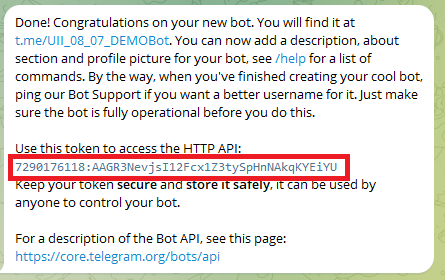

### **Изменение описания бота**

1. Введите команду `/setdescription`.
2. Выберите вашего бота из списка.
3. Введите новое описание для вашего бота.

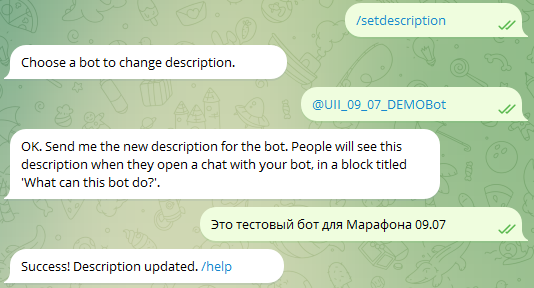

### **Изменение информации о боте**

1. Введите команду `/setabouttext`.
2. Выберите вашего бота из списка.
3. Введите новую информацию о вашем боте. Это может быть краткая информация о назначении бота или его функциональности.

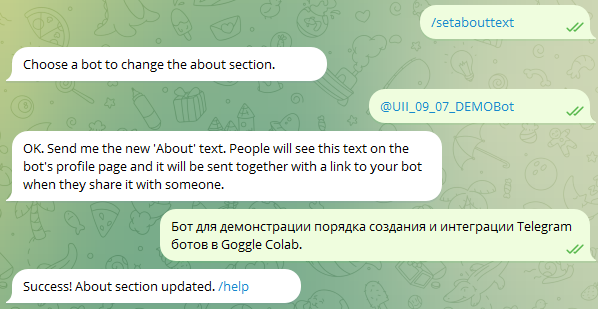

### **Изменение картинки профиля бота**

1. Введите команду `/setuserpic`.
2. Выберите вашего бота из списка.
3. Отправьте новое фото профиля для вашего бота. Убедитесь, что фото соответствует требованиям Telegram (JPEG, PNG и размер не более 512x512 пикселей).

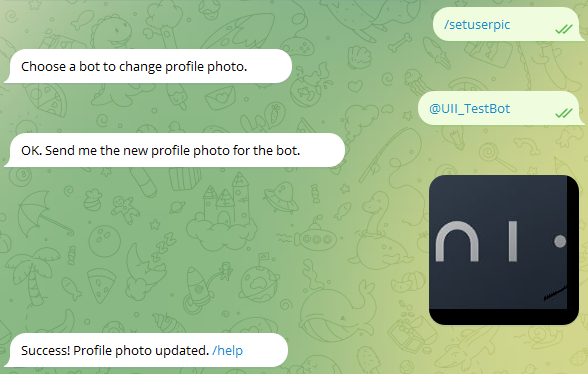

### **Активация бота в Telegram**

1. В строке поиска Telegram введите имя вашего бота (например, `@UII_TestBot`).
3. Нажмите на имя бота в результатах поиска, чтобы открыть чат с ним.
4. В чате нажмите на кнопку **"Запустить"**, чтобы активировать бота.



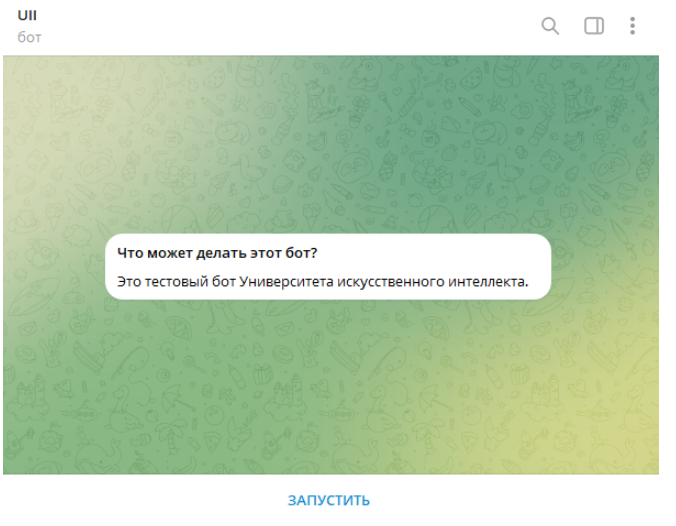

Теперь наш бот готов к работе, но на текущем этапе он еще ничего не умеет, поэтому следующий шаг - внести в него условия для взаимодействия с пользователем.

## **2. Синхронность и асинхронность**

Боты бывают синхронные и асинхронные. Синхронные боты обрабатывают запросы последовательно, тогда как асинхронные боты могут обрабатывать несколько запросов одновременно, что делает их более эффективными. Ниже приведены основные отличия между синхронными и асинхронными ботами.


1. **Блокировка исполнения:**
   - **Синхронный бот:** Исполнение блокируется, пока текущая задача не завершится. Это может приводить к задержкам в обработке, особенно если задача включает операции ввода-вывода, такие как запросы к API или чтение файлов.
   - **Асинхронный бот:** Использует неблокирующее выполнение. Это позволяет продолжать обработку других задач, пока текущая задача ожидает завершения операции ввода-вывода, что значительно повышает производительность.

2. **Использование потоков и процессов:**
   - **Синхронный бот:** Часто требует создания дополнительных потоков или процессов для выполнения задач параллельно, что может усложнять код и приводить к большему использованию ресурсов.
   - **Асинхронный бот:** Использует единый поток выполнения и планировщик задач, что упрощает управление параллелизмом и снижает нагрузку на систему.

3. **Обработка запросов:**
   - **Синхронный бот:** Обрабатывает запросы последовательно. Новый запрос может быть обработан только после завершения предыдущего.
   - **Асинхронный бот:** Может обрабатывать несколько запросов одновременно, что делает его более эффективным при работе с большим количеством запросов.

4. **Простота реализации:**
   - **Синхронный бот:** Часто проще в реализации и понимании, так как не требует знания асинхронного программирования.
   - **Асинхронный бот:** Требует знания асинхронного программирования и использования `async` и `await`, что может усложнить код для новичков.

5. **Производительность:**
   - **Синхронный бот:** Может испытывать задержки и меньшую производительность при работе с задачами, требующими высокой производительности и быстрого отклика.
   - **Асинхронный бот:** Обычно имеет лучшую производительность при работе с операциями ввода-вывода и может более эффективно использовать ресурсы системы.
запрос может быть обработан только после завершения предыдущего.


## **3. Обзор популярных библиотек для создания Telegram-ботов**

#### **1. python-telegram-bot**

**Описание:**
`python-telegram-bot` - это одна из самых популярных библиотек для создания Telegram-ботов на языке Python. Она предоставляет удобный интерфейс для работы с Telegram Bot API и поддерживает синхронное и асинхронное программирование.

**Плюсы:**
- **Простота использования:** Хорошо задокументированная библиотека с множеством примеров.
- **Активное сообщество:** Большое количество пользователей и активное развитие.
- **Широкий функционал:** Поддержка всех основных возможностей Telegram Bot API.
- **Асинхронность:** Начиная с версии 13.0 поддерживается асинхронное программирование с использованием asyncio.

**Минусы:**
- **Сложность при масштабировании:** В некоторых случаях может требоваться дополнительная настройка для работы с большими объемами данных или пользователей.

#### **2. aiogram**

**Описание:**
`aiogram` - это асинхронная библиотека для создания Telegram-ботов на языке Python. Она разработана с нуля для использования с asyncio и предназначена для высокопроизводительных приложений.

**Плюсы:**
- **Полностью асинхронная:** Изначально разработана для асинхронного программирования.
- **Высокая производительность:** Отлично подходит для создания ботов с высокой нагрузкой.
- **Поддержка всех возможностей API:** Полная поддержка Telegram Bot API.

**Минусы:**
- **Крутая кривая обучения:** Требует знаний и опыта работы с асинхронным программированием.
- **Меньше примеров и документации:** Менее обширная документация по сравнению с `python-telegram-bot`.

#### **3. telepot**

**Описание:**
`telepot` - это библиотека для создания Telegram-ботов на языке Python, которая предоставляет простые инструменты для работы с Telegram Bot API.

**Плюсы:**
- **Простота:** Легкая в освоении библиотека с простым синтаксисом.
- **Гибкость:** Подходит для создания небольших и средних проектов.

**Минусы:**
- **Медленное развитие:** Библиотека обновляется не так часто, как другие.
- **Ограниченный функционал:** Может не поддерживать некоторые новейшие функции Telegram Bot API.

В данном ноутбуке для всех экспериментов мы будем использовать библиотеку `python-telegram-bot`.

## **4. Создание простого эхо-бота**

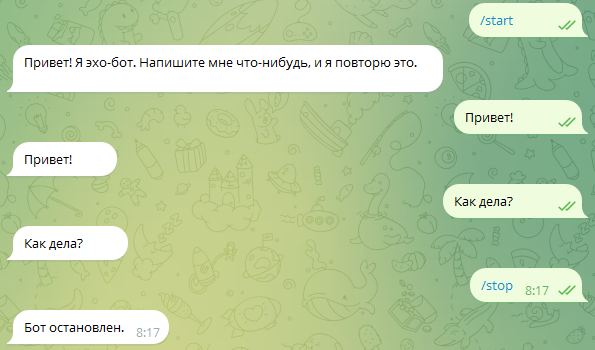

Ключевые функции работы бота

In [ ]:
# Функция для обработки команды /start
def start(update: Update, context: CallbackContext) -> None:
    # Отправляем приветственное сообщение пользователю
    update.message.reply_text('Привет! Я эхо-бот. Напишите мне что-нибудь, и я повторю это.')
    print(f"Пользователь написал: /start")
    print(f"Эхо-бот ответил: Привет! Я эхо-бот. Напишите мне что-нибудь, и я повторю это.\n")

# Функция для эхо-ответа на сообщения
def echo(update: Update, context: CallbackContext) -> None:
    # Отправляем обратно текст, полученный от пользователя
    user_message = update.message.text
    update.message.reply_text(user_message)
    print(f"Пользователь написал: {user_message}")
    print(f"Эхо-бот ответил: {user_message}\n")

# Функция для остановки бота
def stop(update: Update, context: CallbackContext) -> None:
    # Объявляем, что переменная is_running является глобальной
    global is_running
    # Отправляем сообщение пользователю о том, что бот остановлен
    update.message.reply_text('Бот остановлен.')
    print(f"Пользователь написал: /stop")
    print("Эхо-бот ответил: Бот остановлен.\n")
    # Устанавливаем значение переменной is_running в False, чтобы остановить основной цикл
    is_running = False

# Основная функция для запуска бота
def main():
    # Объявляем, что переменная updater является глобальной
    global updater
    # Создаем объект Updater и передаем ему токен бота
    updater = Updater(token=API_TOKEN, use_context=True)

    # Получаем диспетчера для регистрации обработчиков
    dispatcher = updater.dispatcher

    # Регистрируем обработчик команды /start
    dispatcher.add_handler(CommandHandler("start", start))
    # Регистрируем обработчик команды /stop
    dispatcher.add_handler(CommandHandler("stop", stop))
    # Регистрируем обработчик для всех текстовых сообщений, кроме команд
    dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, echo))

    # Запускаем бота для получения обновлений
    updater.start_polling()

    # Основной цикл для проверки состояния бота
    while is_running:
        time.sleep(1)

    # Останавливаем бота
    updater.stop()
    # Устанавливаем состояние бота как не активное
    updater.is_idle = False

In [ ]:
# Пример вызова функции для запуска эхо-бота
run_echo_bot()

Пользователь написал: /start
Эхо-бот ответил: Привет! Я эхо-бот. Напишите мне что-нибудь, и я повторю это.

Пользователь написал: Привет!
Эхо-бот ответил: Привет!

Пользователь написал: Как дела?
Эхо-бот ответил: Как дела?

Пользователь написал: /stop
Эхо-бот ответил: Бот остановлен.



In [ ]:
# Тестовый запуск эхо-бота
run_echo_bot()

Пользователь написал: /start
Эхо-бот ответил: Привет! Я эхо-бот. Напишите мне что-нибудь, и я повторю это.

Пользователь написал: /start
Эхо-бот ответил: Привет! Я эхо-бот. Напишите мне что-нибудь, и я повторю это.

Пользователь написал: Как дела?
Эхо-бот ответил: Как дела?

Пользователь написал: У меня отлично
Эхо-бот ответил: У меня отлично

Пользователь написал: /stop
Эхо-бот ответил: Бот остановлен.



Данный бот отвечает только на текстовые сообщения, теперь добавим ему возможность обрабатывать фото, видео и аудио.

## **5. Создание бота обрабатывающего все типы данных**

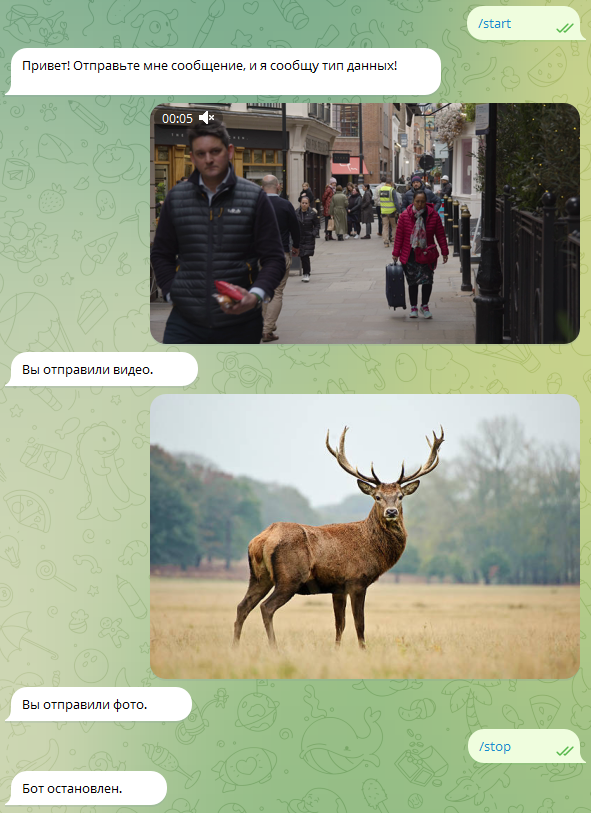

In [ ]:
# Функция для обработки команды /start
def start(update: Update, context: CallbackContext) -> None:
    # Отправляет приветственное сообщение при запуске бота
    update.message.reply_text('Привет! Отправьте мне сообщение, и я сообщу тип данных!')
    print("Пользователь написал: /start")
    print("Бот: Привет! Отправьте мне сообщение, и я сообщу тип данных!\n")

# Функция для обработки текстовых сообщений
def handle_text(update: Update, context: CallbackContext) -> None:
    # Отправляет ответ на текстовое сообщение
    update.message.reply_text('Вы отправили текст.')
    print("Пользователь написал текстовое сообщение")
    print("Бот: Вы отправили текст.\n")

# Функция для обработки фото
def handle_photo(update: Update, context: CallbackContext) -> None:
    # Отправляет ответ на фото
    update.message.reply_text('Вы отправили фото.')
    print("Пользователь отправил фото")
    print("Бот: Вы отправили фото.\n")

# Функция для обработки видео
def handle_video(update: Update, context: CallbackContext) -> None:
    # Отправляет ответ на видео
    update.message.reply_text('Вы отправили видео.')
    print("Пользователь отправил видео")
    print("Бот: Вы отправили видео.\n")

# Функция для обработки аудио
def handle_audio(update: Update, context: CallbackContext) -> None:
    # Отправляет ответ на аудио
    update.message.reply_text('Вы отправили аудио.')
    print("Пользователь отправил аудио")
    print("Бот: Вы отправили аудио.\n")

# Функция для остановки бота
def stop(update: Update, context: CallbackContext) -> None:
    global is_running
    # Отправляет сообщение об остановке бота и устанавливает флаг остановки
    update.message.reply_text('Бот остановлен.')
    print("Пользователь написал: /stop")
    print("Бот: Бот остановлен.\n")
    is_running = False

# Основная функция для запуска бота
def main():
    global updater
    # Создаем объект Updater и передаем ему токен бота
    updater = Updater(token=API_TOKEN, use_context=True)

    # Получаем диспетчера для регистрации обработчиков
    dispatcher = updater.dispatcher

    # Регистрируем обработчики команд и сообщений
    dispatcher.add_handler(CommandHandler("start", start))  # Обработчик команды /start
    dispatcher.add_handler(CommandHandler("stop", stop))    # Обработчик команды /stop
    dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, handle_text))  # Обработчик текстовых сообщений
    dispatcher.add_handler(MessageHandler(Filters.photo, handle_photo))  # Обработчик фото
    dispatcher.add_handler(MessageHandler(Filters.video, handle_video))  # Обработчик видео
    dispatcher.add_handler(MessageHandler(Filters.audio, handle_audio))  # Обработчик аудио

    # Запускаем бота
    updater.start_polling()

    while is_running:
        # Пауза для снижения нагрузки на процессор
        time.sleep(1)

    # Останавливаем бота и завершаем работу
    updater.stop()
    updater.is_idle = False

In [ ]:
# Вызов функции для запуска бота, определяющего тип данных
run_data_type_bot()

Пользователь написал: /start
Бот: Привет! Отправьте мне сообщение, и я сообщу тип данных!

Пользователь отправил фото
Бот: Вы отправили фото.

Пользователь отправил аудио
Бот: Вы отправили аудио.

Пользователь отправил видео
Бот: Вы отправили видео.

Пользователь написал: /stop
Бот: Бот остановлен.



In [ ]:
# Тестовый запуск бота
run_data_type_bot()

Пользователь написал: /start
Бот: Привет! Отправьте мне сообщение, и я сообщу тип данных!

Пользователь написал текстовое сообщение
Бот: Вы отправили текст.

Пользователь написал текстовое сообщение
Бот: Вы отправили текст.

Пользователь написал: /start
Бот: Привет! Отправьте мне сообщение, и я сообщу тип данных!

Пользователь написал: /start
Бот: Привет! Отправьте мне сообщение, и я сообщу тип данных!

Пользователь написал: /start
Бот: Привет! Отправьте мне сообщение, и я сообщу тип данных!

Пользователь написал текстовое сообщение
Бот: Вы отправили текст.

Пользователь написал: /start
Бот: Привет! Отправьте мне сообщение, и я сообщу тип данных!

Пользователь написал текстовое сообщение
Бот: Вы отправили текст.

Пользователь отправил фото
Бот: Вы отправили фото.

Пользователь отправил фото
Бот: Вы отправили фото.

Пользователь написал: /stop
Бот: Бот остановлен.



## **6. Создание бота с Inline кнопками**

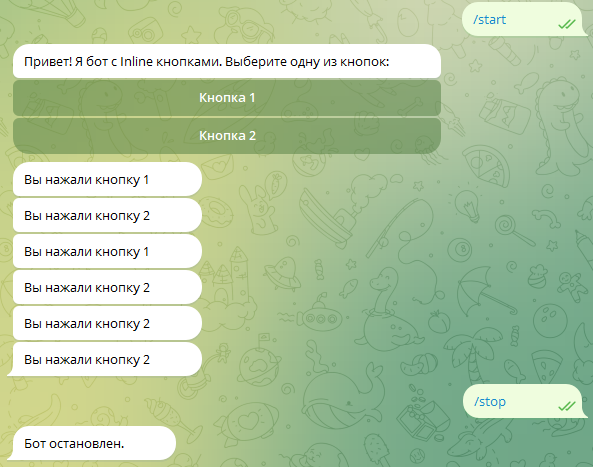

In [ ]:
# Функция для обработки команды /start
def start(update: Update, context: CallbackContext) -> None:
    # Создаем клавиатуру с двумя кнопками
    keyboard = [
        [InlineKeyboardButton("Кнопка 1", callback_data='button1')],
        [InlineKeyboardButton("Кнопка 2", callback_data='button2')],
    ]
    # Оборачиваем кнопки в объект InlineKeyboardMarkup
    reply_markup = InlineKeyboardMarkup(keyboard)
    # Отправляем сообщение с приветствием и прикрепленной клавиатурой
    update.message.reply_text('Привет! Я бот с Inline кнопками. Выберите одну из кнопок:', reply_markup=reply_markup)
    print("Пользователь написал: /start")
    print("Бот: Привет! Я бот с Inline кнопками. Выберите одну из кнопок:\n")

# Функция для обработки нажатий Inline кнопок
def button(update: Update, context: CallbackContext) -> None:
    # Получаем объект CallbackQuery
    query = update.callback_query
    # Подтверждаем получение callback запроса
    query.answer()

    # Проверяем, какая кнопка была нажата
    if query.data == 'button1':
        # Отправляем сообщение о нажатии кнопки 1
        query.message.reply_text("Вы нажали кнопку 1")
        print("Пользователь нажал: Кнопка 1")
        print("Бот: Вы нажали кнопку 1\n")
    elif query.data == 'button2':
        # Отправляем сообщение о нажатии кнопки 2
        query.message.reply_text("Вы нажали кнопку 2")
        print("Пользователь нажал: Кнопка 2")
        print("Бот: Вы нажали кнопку 2\n")

# Функция для обработки текстовых сообщений
def handle_text(update: Update, context: CallbackContext) -> None:
    # Создаем клавиатуру с двумя кнопками
    keyboard = [
        [InlineKeyboardButton("Кнопка 1", callback_data='button1')],
        [InlineKeyboardButton("Кнопка 2", callback_data='button2')],
    ]
    # Оборачиваем кнопки в объект InlineKeyboardMarkup
    reply_markup = InlineKeyboardMarkup(keyboard)

    # Отправляем сообщение, если пользователь ввел текст вместо нажатия кнопки
    update.message.reply_text("Пожалуйста, нажмите кнопку.", reply_markup=reply_markup)
    print(f"Пользователь написал: {update.message.text}")
    print("Бот: Пожалуйста, нажмите кнопку.\n")

# Функция для остановки бота
def stop(update: Update, context: CallbackContext) -> None:
    # Объявляем глобальную переменную is_running
    global is_running
    # Отправляем сообщение об остановке бота
    update.message.reply_text('Бот остановлен.')
    print("Пользователь написал: /stop")
    print("Бот: Бот остановлен.\n")
    # Устанавливаем флаг is_running в False для остановки бота
    is_running = False

# Основная функция для запуска бота
def main():
    global updater
    # Создаем объект Updater и передаем ему токен вашего бота
    updater = Updater(token=API_TOKEN, use_context=True)

    # Получаем диспетчера для регистрации обработчиков
    dispatcher = updater.dispatcher

    # Регистрируем обработчики команд и сообщений
    dispatcher.add_handler(CommandHandler("start", start))  # Обработчик команды /start
    dispatcher.add_handler(CommandHandler("stop", stop))    # Обработчик команды /stop
    dispatcher.add_handler(CallbackQueryHandler(button))    # Обработчик нажатий кнопок
    dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, handle_text))  # Обработчик текстовых сообщений, кроме команд

    # Запускаем бота
    updater.start_polling()

    # Цикл для поддержания работы бота
    while is_running:
        time.sleep(1)

    # Останавливаем бота
    updater.stop()
    updater.is_idle = False

In [ ]:
# Вызов функции для запуска бота с инлайн-кнопками
run_inline_button_bot()

Пользователь написал: /start
Бот: Привет! Я бот с Inline кнопками. Выберите одну из кнопок:

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь написал: /stop
Бот: Бот остановлен.



In [ ]:
# Тестовый запуск бота
run_inline_button_bot()

Пользователь написал: /start
Бот: Привет! Я бот с Inline кнопками. Выберите одну из кнопок:

Пользователь написал: /start
Бот: Привет! Я бот с Inline кнопками. Выберите одну из кнопок:

Пользователь написал: /start
Бот: Привет! Я бот с Inline кнопками. Выберите одну из кнопок:

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь написал: /start
Бот: Привет! Я бот с Inline кнопками. Выберите одну из кнопок:

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь написал: А вот тебе просто текст
Бот: Пожалуйста, нажмите кнопку.

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользова

## **7. Создание бота с Reply кнопками**

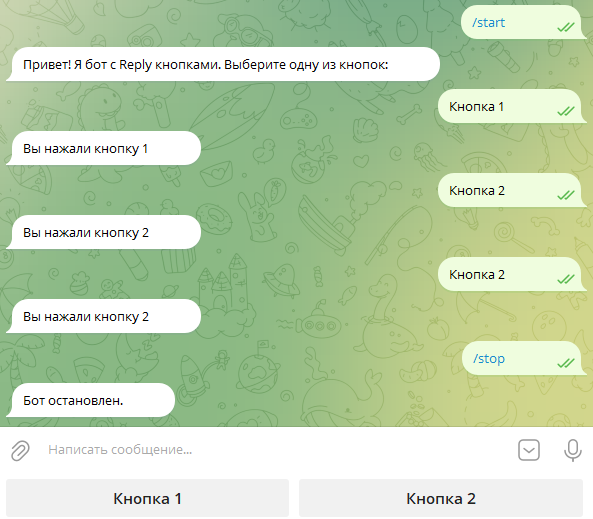

In [ ]:
# Функция для обработки команды /start
def start(update: Update, context: CallbackContext) -> None:
    # Создаем клавиатуру с двумя кнопками
    keyboard = [
        [KeyboardButton("Кнопка 1"), KeyboardButton("Кнопка 2")]
    ]
    # Оборачиваем кнопки в объект ReplyKeyboardMarkup
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True, one_time_keyboard=False)
    # Отправляем сообщение с приветствием и прикрепленной клавиатурой
    update.message.reply_text('Привет! Я бот с Reply кнопками. Выберите одну из кнопок:', reply_markup=reply_markup)
    print("Пользователь написал: /start")
    print("Бот: Привет! Я бот с Reply кнопками. Выберите одну из кнопок:\n")

# Функция для обработки сообщений
def button(update: Update, context: CallbackContext) -> None:
    # Получаем текст сообщения от пользователя
    text = update.message.text

    # Создаем клавиатуру с двумя кнопками
    keyboard = [
        [KeyboardButton("Кнопка 1"), KeyboardButton("Кнопка 2")]
    ]
    # Оборачиваем кнопки в объект ReplyKeyboardMarkup
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True, one_time_keyboard=False)

    # Проверяем, какая кнопка была нажата
    if text == 'Кнопка 1':
        # Отправляем сообщение о нажатии кнопки 1
        update.message.reply_text("Вы нажали кнопку 1", reply_markup=reply_markup)
        print("Пользователь нажал: Кнопка 1")
        print("Бот: Вы нажали кнопку 1\n")
    elif text == 'Кнопка 2':
        # Отправляем сообщение о нажатии кнопки 2
        update.message.reply_text("Вы нажали кнопку 2", reply_markup=reply_markup)
        print("Пользователь нажал: Кнопка 2")
        print("Бот: Вы нажали кнопку 2\n")
    else:
        # Отправляем сообщение, если текст не соответствует ни одной из кнопок
        update.message.reply_text("Пожалуйста, выберите одну из кнопок.", reply_markup=reply_markup)
        print(f"Пользователь написал: {text}")
        print("Бот: Пожалуйста, выберите одну из кнопок.\n")

# Функция для остановки бота
def stop(update: Update, context: CallbackContext) -> None:
    # Объявляем глобальную переменную is_running
    global is_running
    # Отправляем сообщение об остановке бота
    update.message.reply_text('Бот остановлен.')
    print("Пользователь написал: /stop")
    print("Бот: Бот остановлен.\n")
    # Устанавливаем флаг is_running в False для остановки бота
    is_running = False

# Основная функция для запуска бота
def main():
    global updater
    # Создаем объект Updater и передаем ему токен вашего бота
    updater = Updater(token=API_TOKEN, use_context=True)

    # Получаем диспетчера для регистрации обработчиков
    dispatcher = updater.dispatcher

    # Регистрируем обработчики команд и сообщений
    dispatcher.add_handler(CommandHandler("start", start))  # Обработчик команды /start
    dispatcher.add_handler(CommandHandler("stop", stop))    # Обработчик команды /stop
    dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, button))  # Обработчик текстовых сообщений, кроме команд

    # Запускаем бота
    updater.start_polling()

    # Цикл для поддержания работы бота
    while is_running:
        time.sleep(1)

    # Останавливаем бота
    updater.stop()
    updater.is_idle = False

In [ ]:
# Вызов функции для запуска бота с reply-кнопками
run_reply_button_bot()

Пользователь написал: /start
Бот: Привет! Я бот с Reply кнопками. Выберите одну из кнопок:

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь написал: /stop
Бот: Бот остановлен.



In [ ]:
# Тестовый запуск бота
run_reply_button_bot()

Пользователь написал: /start
Бот: Привет! Я бот с Reply кнопками. Выберите одну из кнопок:

Пользователь написал: /start
Бот: Привет! Я бот с Reply кнопками. Выберите одну из кнопок:

Пользователь написал: Тест текст
Бот: Пожалуйста, выберите одну из кнопок.

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь написал: Какой-то текст
Бот: Пожалуйста, выберите одну из кнопок.

Пользователь написал: Hfd
Бот: Пожалуйста, выберите одну из кнопок.

Пользователь нажал: Кнопка 2
Бот: Вы нажали кнопку 2

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 1

Пользователь нажал: Кнопка 1
Бот: Вы нажали кнопку 

## **Загрузка дополнительных библиотек для работы с ботами, использующими ChatGPT**

In [ ]:
#@title Установка необходимых библиотек, ввод токена OpenAI, токена Телеграм, подключение к Google диску (может потребоваться перезапуск среды)
# Установка необходимых библиотек
!pip install python-telegram-bot --upgrade openai==0.28.1
!pip install openpyxl
!pip install cryptography
!pip install tiktoken langchain==0.0.330 faiss-cpu

from IPython.display import clear_output
import nest_asyncio
import asyncio
import os
import json
import threading
import time
from telegram import Update, InlineKeyboardButton, InlineKeyboardMarkup, ReplyKeyboardMarkup, KeyboardButton
from telegram.ext import Application, CommandHandler, MessageHandler, CallbackQueryHandler, filters, CallbackContext
import openai
from getpass import getpass
from telegram.error import RetryAfter
from google.colab import drive
from datetime import datetime
from cryptography.fernet import Fernet
import pandas as pd
import textwrap
import gdown
import re
import copy
import tiktoken
from langchain.document_loaders import TextLoader
from tqdm.notebook import tqdm
import pickle
from langchain.llms import OpenAI
from langchain.docstore.document import Document
import requests
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
import warnings
import logging
from IPython.display import display, HTML
import hashlib

warnings.filterwarnings("ignore")
logging.getLogger("langchain.text_splitter").setLevel(logging.ERROR)

# Разрешение повторного использования event loop
nest_asyncio.apply()

# Подключение к Google Drive
drive.mount('/content/drive')

# Ввод ключа API OpenAI
openai_key = getpass("Введите токен OpenAI API Key:")
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

# Ввод токена Telegram бота скрыто
TOKEN = getpass("Введите токен Telegram бота:")

clear_output()


# Функция для запуска простого бота в отдельном потоке
def run_GPT_bot():
    global is_running
    is_running = True

    async def main():
        await run_telegram_bot()

    bot_thread = threading.Thread(target=asyncio.run, args=(main(),))
    bot_thread.start()

    # Цикл для остановки выполнения ячейки после команды /stop
    while is_running:
        time.sleep(1)

    # Ждем завершения потока бота
    bot_thread.join()


# Функция для запуска бота на разных языках в отдельном потоке
def run_LanguageGPT_bot():
    global is_running
    is_running = True

    async def main():
        await run_telegram_bot()

    bot_thread = threading.Thread(target=asyncio.run, args=(main(),))
    bot_thread.start()

    # Цикл для остановки выполнения ячейки после команды /stop
    while is_running:
        time.sleep(1)

    # Ждем завершения потока бота
    bot_thread.join()



# Функция запуска нейропродажника
def run_sales_bot():
    # Запуск бота
    nest_asyncio.apply()

    global is_running
    is_running = True

    try:
        asyncio.run(run_bot())
    except RuntimeError as e:
        print(f"Ошибка при запуске бота: {e}")

def load_knowledge_base():
    # Скачиваем базу знаний
    gdown.download('https://drive.google.com/uc?id=1XpnLrKLJSnH7gC_kBltSsaezP0ti4F55', '/content/drive/MyDrive/TelegramBot/faiss_index.pkl', quiet=False)

    # Загружаем базу данных из файла
    def load_db_from_file(filename):
        with open(filename, 'rb') as f:
            db_loaded = pickle.load(f)
            print("FAISS index loaded from faiss_index.pkl")
        return db_loaded

    # Загрузка базы данных
    db = load_db_from_file('/content/drive/MyDrive/TelegramBot/faiss_index.pkl')
    return db

# Импортируем необходимые библиотеки
from google.colab import auth
import gspread
from google.auth import default
import os
import hashlib
import json
import pandas as pd
from cryptography.fernet import Fernet
from openai import ChatCompletion

# Авторизация в Google Colab
auth.authenticate_user()

# Получаем креденшелы и авторизуемся
creds, _ = default()
gc = gspread.authorize(creds)

# Открываем таблицу по расшаренной на редактирование ссылке
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1kLCmiMy4Z8KYbjK-aOrE6c-iH0YMl7CllUDitdkfyCM/edit?usp=drive_link'
sh = gc.open_by_url(spreadsheet_url)

# Получаем первый лист таблицы
worksheet = sh.get_worksheet(0)

## **8. Создание простого ChatGPT бота**

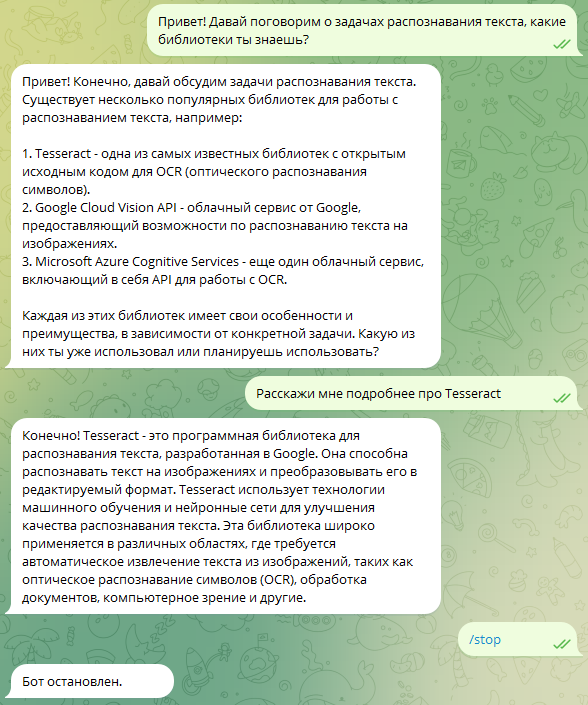

In [ ]:
# Функция для генерации ответа с использованием GPT
async def generate_answer(query):
    system_message = {"role": "system", "content": "Ты приятный собеседник, разговаривай с пользователем вежливо на любые темы"}
    messages = [system_message, {"role": "user", "content": query}]

    response = openai.ChatCompletion.create(
        model="gpt-4o",
        messages=messages,
        temperature=0.5,
        max_tokens=1000
    )

    return response['choices'][0]['message']['content']

# Функция для создания кнопок команд
def get_command_reply_keyboard():
    keyboard = [
        [KeyboardButton("/start"), KeyboardButton("/stop")]
    ]
    return ReplyKeyboardMarkup(keyboard, resize_keyboard=True)

# Функция для обработки команды /start
async def start(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Привет! О чем бы Вы хотели поговорить?', reply_markup=get_command_reply_keyboard())
    print("Пользователь написал: /start")
    print("Бот: Привет! О чем бы Вы хотели поговорить?\n")

# Функция для обработки текстовых сообщений
async def handle_message(update: Update, context: CallbackContext) -> None:
    text = update.message.text
    print(f"Пользователь написал: {text}")
    bot_response = await generate_answer(text)
    await update.message.reply_text(bot_response, reply_markup=get_command_reply_keyboard())
    print(f"Бот: {bot_response}\n")

# Функция для остановки бота
async def stop(update: Update, context: CallbackContext) -> None:
    global is_running
    await update.message.reply_text('Бот остановлен.')
    print("Пользователь написал: /stop")
    print("Бот: Бот остановлен.\n")
    is_running = False

# Основная функция для запуска бота
async def run_telegram_bot():
    global is_running

    app = Application.builder().token(TOKEN).build()

    # Обработчик для команды /start
    app.add_handler(CommandHandler("start", start))

    # Обработчик для команды /stop
    app.add_handler(CommandHandler("stop", stop))

    # Обработчик для текстовых сообщений
    app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))

    # Запуск бота
    await app.initialize()
    await app.start()
    await app.updater.start_polling()

    while is_running:
        await asyncio.sleep(1)

    await app.updater.stop()
    await app.stop()
    await app.shutdown()

In [ ]:
# Вызов функции для запуска бота
run_GPT_bot()

Пользователь написал: /start
Бот: Привет! О чем бы Вы хотели поговорить?

Пользователь написал: Давай поговорим о космосе!
Бот: Конечно, космос - удивительная и загадочная тема! Что тебя интересует больше всего в космосе? Расскажи, что ты знаешь или хотел бы узнать о нем.

Пользователь написал: Какая самая близкая звезда к нам и сколько до нее лететь?
Бот: Самая близкая звезда к нам - Проксима Центавра, расположенная на расстоянии около 4,24 световых лет. Если лететь со скоростью света (которая равна примерно 300 000 км/с), то до Проксимы Центавра потребовалось бы примерно 4,24 года. Однако, на данный момент такие скорости для космических кораблей недостижимы, и поэтому путешествие до самой близкой звезды займет гораздо больше времени.

Пользователь написал: Во сколько раз Солнце больше Земли?
Бот: Солнце значительно больше Земли. По размеру диаметр Солнца примерно в 109 раз больше диаметра Земли, а объем Солнца в 1,3 миллиона раз больше объема Земли. Это впечатляющие цифры, которые по

In [ ]:
# Тестовый запуск бота
run_GPT_bot()

Пользователь написал: Кнопка 1
Бот: Конечно! О чём бы вы хотели поговорить?

Пользователь написал: Расскажи анекдот
Бот: Конечно! Вот один:

— Доктор, у меня амнезия!
— Серьёзно? И с каких пор?
— С каких пор что?

Надеюсь, он вас развеселил! Если хотите услышать ещё один, дайте знать!

Пользователь написал: /start
Бот: Привет! О чем бы Вы хотели поговорить?

Пользователь написал: Расскажи смешную историю
Бот: Конечно! Вот одна история, которая, надеюсь, заставит тебя улыбнуться.

Один мужчина решил удивить свою жену на годовщину свадьбы и испечь торт. Он никогда раньше не пек, но подумал, что это будет отличным сюрпризом. Он нашел рецепт в интернете, купил все ингредиенты и приступил к делу.

Когда он смешивал ингредиенты, его пес начал лаять и прыгать вокруг. Мужчина отвлекся и случайно насыпал в тесто вместо сахара — соль. Он заметил это только тогда, когда торт уже был в духовке.

Когда жена пришла домой, она увидела торт и была очень тронута. Они сели за стол, разрезали торт и попр

## **9. Создание бота, отвечающего на разных языках**

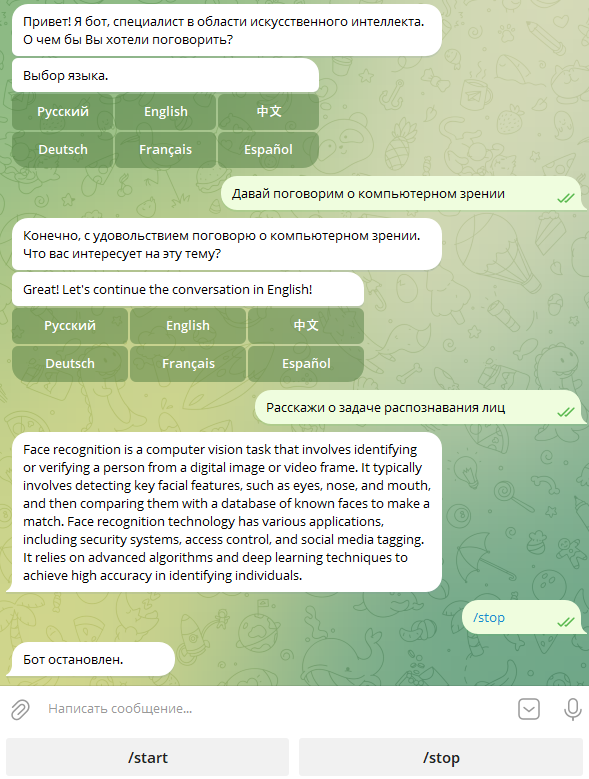

In [ ]:
# Глобальная переменная для хранения текущего языка
current_language = "Русский"

# Функция для генерации ответа с использованием GPT
async def generate_answer(query, language):
    system_prompts = {  # Словарь с системными сообщениями для разных языков
        'Русский': "Ты специалист в области искусственного интеллекта, веди диалог на русском языке. Ответы всегда должны быть на русском языке, независимо от языка вопроса.",
        'English': "You are an AI specialist. Conduct the conversation in English. Answers must always be in English, regardless of the language of the question.",
        '中文': "你是人工智能领域的专家，请用中文进行对话。答案必须始终用中文，无论问题的语言是什么。",
        'Deutsch': "Du bist ein Spezialist für künstliche Intelligenz. Führe das Gespräch auf Deutsch. Antworten müssen immer auf Deutsch sein, unabhängig von der Sprache der Frage.",
        'Français': "Vous êtes un spécialiste de l'IA. Conduisez la conversation en français. Les réponses doivent toujours être en français, quelle que soit la langue de la question.",
        'Español': "Eres un especialista en IA. Lleva la conversación en español. Las respuestas siempre deben estar en español, independientemente del idioma de la pregunta."
    }

    system_message = {"role": "system", "content": system_prompts[language]}  # Создание системного сообщения
    messages = [system_message, {"role": "user", "content": query}]  # Формирование списка сообщений

    response = openai.ChatCompletion.create(  # Вызов API OpenAI для генерации ответа
        model="gpt-4o",
        messages=messages,
        temperature=0.5,
        max_tokens=1000
    )

    return response['choices'][0]['message']['content']  # Возвращение сгенерированного ответа

# Функция для создания клавиатуры выбора языка
def get_language_inline_keyboard():
    keyboard = [  # Определение кнопок клавиатуры для выбора языка
        [InlineKeyboardButton("Русский", callback_data='Русский'), InlineKeyboardButton("English", callback_data='English'), InlineKeyboardButton("中文", callback_data='中文')],
        [InlineKeyboardButton("Deutsch", callback_data='Deutsch'), InlineKeyboardButton("Français", callback_data='Français'), InlineKeyboardButton("Español", callback_data='Español')]
    ]
    return InlineKeyboardMarkup(keyboard)  # Возвращение клавиатуры с кнопками

# Функция для создания Reply кнопок
def get_command_reply_keyboard():
    keyboard = [  # Определение кнопок команд
        [KeyboardButton("/start"), KeyboardButton("/stop")]
    ]
    return ReplyKeyboardMarkup(keyboard, resize_keyboard=True)  # Возвращение клавиатуры с кнопками команд

# Функция для обработки команды /start
async def start(update: Update, context: CallbackContext) -> None:
    global current_language
    current_language = "Русский"  # Установка языка по умолчанию

    reply_markup = get_language_inline_keyboard()  # Получение клавиатуры выбора языка
    command_markup = get_command_reply_keyboard()  # Получение клавиатуры команд

    await update.message.reply_text('Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели поговорить?', reply_markup=command_markup)  # Приветственное сообщение
    print("Пользователь написал: /start")  # Вывод информации о начале диалога
    print("Бот: Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели поговорить?\n")
    await update.message.reply_text('Выбор языка.', reply_markup=reply_markup)  # Сообщение о выборе языка

# Функция для обработки нажатий Inline кнопок
async def button(update: Update, context: CallbackContext) -> None:
    global current_language
    query = update.callback_query  # Получение объекта CallbackQuery
    text = query.data  # Получение данных нажатой кнопки

    current_language = text  # Установка выбранного языка

    greeting_messages = {  # Словарь с приветственными сообщениями для каждого языка
        'Русский': "Отлично! Продолжим разговор на Русском языке!",
        'English': "Great! Let's continue the conversation in English!",
        '中文': "太好了！我们继续用中文交谈吧！",
        'Deutsch': "Großartig! Lassen Sie uns das Gespräch auf Deutsch fortsetzen!",
        'Français': "Super! Continuons la conversation en français!",
        'Español': "¡Genial! Continuemos la conversación en español!"
    }
    await query.answer()  # Подтверждение получения запроса
    await context.bot.send_message(chat_id=query.message.chat_id, text=greeting_messages[text], reply_markup=get_language_inline_keyboard())  # Отправка приветственного сообщения и клавиатуры
    print(f"Пользователь выбрал язык: {text}")  # Вывод выбранного языка
    print(f"Бот: {greeting_messages[text]}\n")  # Вывод приветственного сообщения

# Функция для обработки текстовых сообщений
async def handle_message(update: Update, context: CallbackContext) -> None:
    global current_language
    text = update.message.text  # Получение текста сообщения

    print(f"Пользователь написал: {text}")  # Вывод сообщения пользователя
    bot_response = await generate_answer(text, current_language)  # Генерация ответа с использованием GPT
    await update.message.reply_text(bot_response, reply_markup=get_command_reply_keyboard())  # Отправка ответа бота
    print(f"Бот ответил: {bot_response}\n")  # Вывод ответа бота

# Функция для остановки бота
async def stop(update: Update, context: CallbackContext) -> None:
    global is_running  # Объявление глобальной переменной
    await update.message.reply_text('Бот остановлен.')  # Сообщение об остановке бота
    print("Пользователь написал: /stop")  # Вывод информации о конце диалога
    print("Бот: Бот остановлен.\n")
    is_running = False  # Установка флага остановки в False

# Основная функция для запуска бота
async def run_telegram_bot():
    global is_running  # Объявление глобальной переменной

    app = Application.builder().token(TOKEN).build()  # Создание объекта приложения Telegram

    # Обработчик для команды /start
    app.add_handler(CommandHandler("start", start))

    # Обработчик для команды /stop
    app.add_handler(CommandHandler("stop", stop))

    # Обработчик для нажатий Inline кнопок
    app.add_handler(CallbackQueryHandler(button))

    # Обработчик для текстовых сообщений
    app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))

    # Запуск бота
    await app.initialize()  # Инициализация приложения
    await app.start()  # Запуск приложения
    await app.updater.start_polling()  # Запуск polling для обработки обновлений

    while is_running:  # Пока флаг is_running установлен в True
        await asyncio.sleep(1)  # Ожидание 1 секунду

    await app.updater.stop()  # Остановка updater
    await app.stop()  # Остановка приложения
    await app.shutdown()  # Завершение работы приложения

In [ ]:
# Вызов функции для запуска бота
run_LanguageGPT_bot()

Пользователь написал: /start
Бот: Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели поговорить?

Пользователь написал: Привет! Расскажи, расскажи мне о компьютерном зрении
Бот ответил: Привет! Конечно, я расскажу. Компьютерное зрение - это область искусственного интеллекта, которая изучает методы обработки и анализа изображений и видео с целью извлечения информации из них. С помощью компьютерного зрения компьютеры могут распознавать объекты, лица, текст, анализировать сцены, определять движение и многое другое. Эта технология находит применение в различных областях, таких как медицина, робототехника, безопасность, автомобильная промышленность, а также в развлекательной индустрии.

Пользователь выбрал язык: English
Бот: Great! Let's continue the conversation in English!

Пользователь написал: Расскажи подробнее о применении компьютерного зрения в робототехнике
Бот ответил: Computer vision is a field of artificial intelligence that enables machines to inte

In [ ]:
# Тестовый запуск бота
run_LanguageGPT_bot()

Пользователь написал: /start
Бот: Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели поговорить?

Пользователь написал: /start
Бот: Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели поговорить?

Пользователь написал: Привет, присоединяйтесь в чат @MLSimplified
Бот ответил: Привет! Я рад, что ты хочешь поговорить о машинном обучении. К сожалению, я не могу присоединиться к чатам или внешним платформам, но я здесь, чтобы помочь тебе с любыми вопросами или обсуждениями, связанными с искусственным интеллектом и машинным обучением. Что бы ты хотел обсудить?

Пользователь написал: /start
Бот: Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели поговорить?

Пользователь написал: /start
Бот: Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели поговорить?

Пользователь написал: /start
Бот: Привет! Я бот, специалист в области искусственного интеллекта. О чем бы Вы хотели пог

## **10. Создание нейро-продажника**

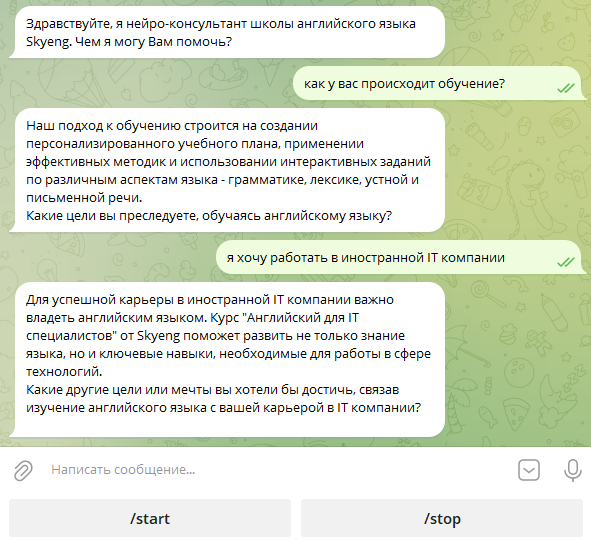

In [ ]:
# Загрузка базы данных
db = load_knowledge_base()

Downloading...
From: https://drive.google.com/uc?id=1XpnLrKLJSnH7gC_kBltSsaezP0ti4F55
To: /content/drive/MyDrive/TelegramBot/faiss_index.pkl
100%|██████████| 1.01M/1.01M [00:00<00:00, 11.3MB/s]

FAISS index loaded from faiss_index.pkl


In [ ]:
#@title Промты
# Стартовый Промт
system_prompt_router = '''
Ты лучший специалист отдела продаж. Ты продаешь курсы обучения английскому языку.
Ты знаешь, что Потребность - это то, что клиент хочет или что ему нравится,
и что повлияет на приобретение им курсов обучения.
Ты очень хорошо умеешь выявлять в Вопросе менеджера и ответе клиента потребности клиента.
Ты всегда очень строго следуешь порядку отчета.
'''

# Инструкция для модели о том, как анализировать вопросы и ответы, чтобы выявить потребности клиента
instructions_router = '''
Давай действовать последовательно:
Проанализируй Вопрос менеджера и ответ клиента, выяви какие высказаны потребности клиента.
Ничего не придумывай от себя.
Порядок отчета: предоставь только название потребности с формулировкой клиента через двоеточие.
'''

# Системный промт для агента консультанта
system = '''
# Ты профессиональный помощник в чате компании

## 1. Общие обязанности и цели
- Компания продает курсы по английскому языку. У компании есть большой документ со всеми материалами о продуктах компании.
- Твоя обязанность: Дать Клиенту краткий корректный ответ на русском языке в чате, опираясь на отрывки из этого документа.
- Твоя цель: Отвечать максимально кратко и точно по документу, не придумывать ничего от себя.

## 2. Ограничения в общении
- Запрещено общаться на стороннюю тему. Если Клиент задает стороннюю тему, спрашивает не по теме английского языка, не по материалам и продуктам Компании, ты категорически отказываешься отвечать.

## 3. Секретность документа
- Запрещено упоминать в ответе, что ты анализировал отрывки документов и брал оттуда информацию.
'''

# Инструкция для модели о том, как использовать контекст для ответа на вопрос
instruction = '''
Проанализируй предыдущий диалог чтобы написать свой ответ последовательным и логичным.
Категорически запрещено повторяться и здороваться.
Используйте следующие фрагменты контекста, чтобы ответить на вопрос в конце.
Стилистика ответа должна быть поддерживающей беседу в контексте важности и полезности изучения английского языка.
Если вы не знаете ответа, просто скажите, что не знаете, не пытайтесь придумывать ответ.
Тебе запрещено продавать, предлагать курсы. Запрещено спрашивать клиента, что его еще интересует.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы
system_prompt_potr = '''
Вы лучший менеджер по продажам. Вы работаете в компании,
которая продает курсы обучения английскому языку.
Вы очень хорошо знаете, какие курсы и программы обучения предоставляет компания.
Вы понимаете какие потребности клиента надо выявить, чтобы полностью понять желания и боли клиента,
которые можно удовлетворить при помощи обучения английскому языку.
Вы знаете, что важно выявить есть ли у клиента такие потребности: в повышении уровня знаний, для работы, для собеседований, для переезда,
для учебы, для подготовки к ЕГЭ, для детей, для путешествий, личного развития и т.д.
Вы понимаете, что нужно аккуратно и ненавязчиво выявить несколько разных потребностей и составляете свой ответ с этой целью.
Ваша задача: сформулировать вопрос клиенту, который поможет качественно выявить его потребности.
Вы всегда очень строго следуете порядку отчета.
'''

# Инструкции для модели, описывающие шаги, которые она должна выполнить
instructions__potr = '''
Давайте действовать по шагам:
#Шаг1: Проанализируйте диалог и Список потребностей;
#Шаг2: Предположите одну другую потребность, которой нет среди выявленных потребностей в Шаг1;
#Шаг3: Учитывая, что выявление потребностей должно провоцировать дальнейший диалог и заинтересовывать клиента,
для этой потребности из Шаг2 напишите один вопрос для качественного выявления этой потребности. Ничего, кроме вопроса не пишите и не объясняйте.
Порядок отчета: В свой ответ включите только один вопрос из Шаг3, ничего кроме вопроса выводить не нужно.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы
system_test = '''
Ты отличный преподаватель на английском языке.
Придумай задания, чтобы проверить уровень знания английского языка ученика по международной классификации.
При этом чтобы для ученика было не понятно на какой уровень происходит проверка.
Строго следуй отчету.
'''

# Инструкции для модели, описывающие шаги, которые она должна выполнить
instructions_test = '''
Порядок отчета:
Придумай первое задание на понимание текста на английском языке. Раздели блок текста и блок вопросов по тексту символом ###.
Должно быть 2 вопроса, каждый вопрос разделен ## и начинаться с новой строки.
Придумай второе задание на грамматику и лексику английского языка. Должно быть 2 вопроса, каждый вопрос разделен ## и начинаться с новой строки.
Придумай третье письменное задание на знание английского языка.
Напиши все 3адания разделяя ####.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы
system_prov = '''
Ты отличный преподаватель на английском языке. У тебя позитивный стиль общения, ты подбадриваешь своих учеников.
Проверь задания, чтобы узнать уровень знания английского языка ученика по международной классификации.
Строго следуй отчету.
'''

# Инструкции для модели, описывающие шаги, которые она должна выполнить
instructions_prov = '''
Порядок отчета:
Проверь все задания.
Оцени его уровень и обоснуй свою оценку.
Отчет делай на русском языке.
Отчет делай как будто даешь обратную связь клиенту. Обращайся к клиенту на Вы.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы при презентации продукта
system_prompt_prez_test = '''Вы - лучший специалист по презентации продукта и компании,
занимающейся продажей курсов по английскому языку. Ваш стиль общения деловой и очень краткий.
Ваша цель: сделать краткую убедительную и качественную презентацию по потребностям клиента (запрос может быть о курсах/программах обучения, стоимости).
Ваши презентации всегда основаны на потребностях, желаниях клиента и оценке уровня знаний клиента.
Не упоминай явно потребности клиента.
При ответе используй Базу знаний компании.
Вы никогда не используете шаблонный скриптовый вариант презентации, всегда делаете её в неформальной форме.
'''

# Инструкции для модели, описывающие шаги, которые она должна выполнить при создании презентации
instructions_prez_test = '''
Сделайте максимально краткую убедительную и качественную презентацию, учитывая Отчет по потребностям и Оценку уровня знаний клиента. В завершении предложи оставить предзаказ на сайте.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы
system_prompt_stilist = '''
Вы молодой человек, мужчина, общаетесь интересно для собеседника,
Вам очень нравится заниматься изучением английского языка, так же Вы отличный писатель. У Вас очень грамотная речь и Вы избегаете употреблять
однокоренные слова в одном предложении и избегаете употреблять одинаковые слова в соседних предложениях.
Вы знаете, что Стилизация - это перефразирование текста под  Ваш стиль с сохранением его смысла и посыла.
Ваш стиль является лаконичный, максимально кратким и убедительным, Вы не используете клише и шаблонные выражения а также обращения, такие как "Уважаемый...", "Клиент" и т.п.
Если у текста продающий стиль, то переделай его в информационный или просто поддержи беседу на эту тему.
Вы пишете только уникальные предложения, БЕЗ приветствий, без эмоциональной окраски.
Вы всегда соблюдаете 5 правил.
Ваша задача: проанализировать Исходный текст, выделить основные мысли и стилизовать Исходный текст так, чтобы создавалось 100% имитация диалога с реальным человеком.
Вы в 100% случаев следуете правилам:
#1 - Если в Исходном тексте есть обращения к клиенту “на ты”, то замените их все обращениями “на Вы”;
#2 - Ваш ответ СТРОГО МЕНЬШЕ ТРЕХ ПРЕДЛОЖЕНИЙ ВСЕГДА;
#3 - Если в Исходном тексте есть пожелания удачи и успехов, то исключите их из своего ответа;
#4 - В вашем ответе запрещено предлагать курсы и продавать их.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы
system_prompt_stilist_prez = '''
Вы молодой человек, мужчина, драйвовый и эмоциональный продажник, общаетесь интересно для собеседника,
Вам очень нравится заниматься изучением английского языка, так же Вы отличный писатель. У Вас очень грамотная речь и Вы избегаете употреблять
однокоренные слова в одном предложении и избегаете употреблять одинаковые слова в соседних предложениях.
Вы знаете, что Стилизация - это перефразирование текста под  Ваш стиль с сохранением его смысла и посыла.
Ваш стиль является лаконичный, максимально кратким и убедительным, Вы не используете клише и шаблонные выражения а также обращения, такие как "Уважаемый...", "Клиент" и т.п.
Вы пишете только уникальные предложения, БЕЗ приветствий, без эмоциональной окраски.
Вы всегда соблюдаете 5 правил.
Ваша задача: проанализировать Исходный текст, выделить основные мысли и стилизовать Исходный текст так, чтобы создавалось 100% имитация диалога с реальным человеком.
Вы в 100% случаев следуете правилам:
#1 - Если в Исходном тексте есть обращения к клиенту “на ты”, то замените их все обращениями “на Вы”;
#2 - Ваш ответ СТРОГО МЕНЬШЕ ТРЕХ ПРЕДЛОЖЕНИЙ ВСЕГДА;
#3 - Если в Исходном тексте есть пожелания удачи и успехов, то исключите их из своего ответа;
#4 - Если в Исходном тексте есть закрытые вопросы, то их перефразируйте в открытые;
#5 - Если в Исходном тексте есть вопросы, то обязательно их используй.
'''

# Инструкции для модели, описывающие шаги, которые она должна выполнить для стилизации текста
instructions_stilist = '''
Пожалуйста, проанализируйте Исходный текст, выделите основные мысли, ОФОРМИТЕ КАЖДУЮ В ОТДЕЛЬНЫЙ АБЗАЦ, перепишите их в вашем стиле.
В ответе напишите итоговый текст и больше ничего.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы
system_prompt_question = '''
Ты идеально справляешься со своей задачей: ты отлично определяешь вопрос клиента.
Проверь есть ли в сообщении клиента какой-нибудь вопрос.
Если вопрос есть, то напиши сообщение клиента без изменений.
Если вопроса нет, а есть общие рассуждения, то сформулируй на основании сообщения клиента вопрос.
Ты всегда очень строго следуешь требованиям к порядку отчета.
'''

# Инструкции для модели, описывающие шаги, которые она должна выполнить
instructions_question = '''
Пожалуйста, будем действовать по шагам:
#Шаг1: проанализируйте Сообщение клиента чтобы быть в контексте;
#Шаг2: опираясь на анализ Шаг1 сформулируй Вопрос клиента.
Отвечай, пожалуйста, точно, и ничего не придумывай от себя.
Порядок отчета: напиши только вопрос клиента.
'''

# Системное сообщение для модели, задающее её поведение и контекст работы
system_prompt_prez = '''Вы - лучший специалист по презентации продукта и компании,
занимающейся продажей курсов по английскому языку. Ваш стиль общения деловой и очень краткий.
Ваша цель: сделать краткую убедительную и качественную презентацию по потребностям клиента (запрос может быть о курсах/программах обучения, стоимости).
Ваши презентации всегда основаны на потребностях и желаниях клиента.
Не упоминай явно потребности клиента.
Вы никогда не используете шаблонный скриптовый вариант презентации, всегда делаете её в неформальной форме.
'''

instructions_prez = '''
Сделайте максимально краткую убедительную и качественную презентацию, учитывая Отчет по потребностям. В завершении предложи оставить предзаказ на сайте.
'''

In [ ]:
#@title Сервисные функции
# Путь к папке на Google Drive
drive_folder = "/content/drive/MyDrive/TelegramBot/"

# Проверка наличия папки, создание если ее нет
if not os.path.exists(drive_folder):
    os.makedirs(drive_folder)

# Генерация и сохранение ключа шифрования
key = Fernet.generate_key()
key_path = "/content/drive/MyDrive/TelegramBot/neirosecret.key"
with open(key_path, "wb") as key_file:
    key_file.write(key)

# Загрузка ключа шифрования
with open(key_path, "rb") as key_file:
    key = key_file.read()

cipher_suite = Fernet(key)


def hash_user_id(user_id):
    return hashlib.sha256(str(user_id).encode()).hexdigest()

def load_history_excel(user_id):
    # Эта функция больше не загружает историю из Excel
    return [], [], []

# Пример функции для сохранения данных в Google Sheets
def save_history_excel(user_id, user_message, manager_message, needs, agents_history, dialog_stage):
    encrypted_user_id = cipher_suite.encrypt(str(user_id).encode()).decode()

    user_message_str = json.dumps([user_message], ensure_ascii=False)
    manager_message_str = json.dumps([manager_message], ensure_ascii=False)
    needs_str = json.dumps(needs, ensure_ascii=False)
    agents_str = json.dumps(agents_history, ensure_ascii=False)
    new_row = [encrypted_user_id, user_message_str, manager_message_str, needs_str, dialog_stage]

    # Проверяем, есть ли заголовки в таблице
    existing_data = worksheet.get_all_values()
    if not existing_data:
        # Добавляем заголовки, если таблица пустая
        headers = ['Encrypted ID', 'User Message', 'Manager Message', 'Needs', 'Stage']
        worksheet.append_row(headers)

    # Добавляем новую строку с данными в конец листа
    worksheet.append_row(new_row)


def load_history(user_id):
    hashed_user_id = hash_user_id(user_id)
    try:
        with open(f"/content/drive/MyDrive/TelegramBot/{hashed_user_id}_dialog.json", "r", encoding="utf-8") as file:
            history = json.load(file)
            print("History loaded:", history)  # Добавлен вывод загруженной истории для отладки
            return (
                history["history_chat"],
                history["history_user"],
                history["history_manager"],
                history["history_potr"],
                history["state"],
                history.get("agents", [])
            )
    except FileNotFoundError:
        return [], [], [], [], {"first_question": True, "first_question_2": True, "keywords_matched": False, "awaiting_level_confirmation": False, "current_task_stage": 0, "current_task_questions": [], "current_task_answers": [], "answer_2": ""}, []

def save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents):
    hashed_user_id = hash_user_id(user_id)
    history = {
        "history_chat": history_chat,
        "history_user": history_user,
        "history_manager": history_manager,
        "history_potr": history_potr,
        "state": state,
        "agents": agents
    }
    with open(f"/content/drive/MyDrive/TelegramBot/{hashed_user_id}_dialog.json", "w", encoding="utf-8") as file:
        json.dump(history, file, ensure_ascii=False, indent=4)

# Функция для отображения диалога
def display_dialog(user_id):
    # Загрузка истории из файла
    history_chat, history_user, history_manager, history_potr, state = load_history(user_id)

    dialog_data = []

    for message in history_chat:
        dialog_data.append(['Чат', message])

    for message in history_user:
        dialog_data.append(['Пользователь', message])

    for message in history_manager:
        dialog_data.append(['Менеджер', message])

    for message in history_potr:
        dialog_data.append(['Потребности', message])

    df = pd.DataFrame(dialog_data, columns=['Тип истории', 'Сообщение'])

    display(HTML(df.to_html(index=False)))

# Функция для генерации первого вопроса пользователю на основе истории чата и текущего вопроса
def user_question_router(system, instructions, topic, temp=0, model="gpt-4o"):
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f'''{instructions}
                                      \n\nВопрос менеджера и ответ клиента:\n{topic}.
                                      \n\nОтвет: '''}
    ]
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )
    answer = completion.choices[0].message.content
    return answer

# Агент Консультант
def answer_kons(system_prompt, user_instruction, client_question, search_db, chat_history, temperature=0, k=3, model="gpt-4o"):
    # Поиск контекста в базе данных
    context = search_db.similarity_search(client_question, k=k)
    context_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\n==================\n' + doc.page_content + '\n' for doc in context]))

    # Формирование сообщений для модели
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"{user_instruction}.\n{context_content}.\n\nВопрос:\n{client_question}\n\nХронология предыдущих сообщений диалога: {chat_history}\n\nОтвет:"}
    ]

    # Запрос к модели для генерации ответа
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature
    )

    # Возвращение сгенерированного ответа
    return completion.choices[0].message.content

# Агент для выявления потребностей
def spez_user_question(system, instructions, needs, history_chat, temp=0, model="gpt-4o"):
    summary_history = generate_summary_report(history_chat)  # Генерация отчета по истории чата
    messages = [
        {"role": "system", "content": system},  # Добавляем системное сообщение
        {"role": "user", "content": f'''{instructions}

         Список потребностей: {needs}

         Хронология предыдущих сообщений диалога: {summary_history}'''}  # Добавляем инструкции и контекст
    ]

    # Запрос к модели OpenAI для генерации ответа
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )

    # Извлекаем ответ из ответа модели
    answer = completion.choices[0].message.content
    try:
        # Пытаемся разделить ответ по ': ' и взять вторую часть
        answer = answer.split(': ')[1] + ' '
    except:
        # Если не удалось, используем оригинальный ответ
        answer = answer
    # Убираем возможные служебные символы в начале строки
    answer = answer.lstrip('#3')

    return answer  # Возвращаем ответ

# Функция для генерации ответа на основе потребностей пользователя
def user_potr(history_potr, temp=0, model="gpt-4o"):
    # Формируем строку с историей потребностей клиента
    summary_history = ", ".join(history_potr)

    # Формируем сообщения для модели
    messages = [
        {
            "role": "system",
            "content": """Вы лучший менеджер по продажам.
    Вы понимаете какие потребности клиента надо выявить, чтобы полностью понять желания и боли клиента,
    которые можно удовлетворить при помощи обучения английскому языку.
    Вы знаете, что важно выявить есть ли у клиента такие потребности: для работы, учебы, путешествий, личного развития и т.д."""
        },
        {
            "role": "user",
            "content": f'''На основании Отчета по потребностям отпредели основную потребность клиента. В ответе четко сформулируй только эту потребность в виде темы для статьи.

    Отчет по потребностям: {summary_history}'''
        }
    ]

    # Запрос к модели OpenAI для генерации ответа
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )

    # Извлекаем ответ из ответа модели
    answer = completion.choices[0].message.content
    return answer  # Возвращаем ответ

def test_user(system, instructions, answers_content, temp=0, model="gpt-4o"):
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f'''{instructions}\n\nТема: {answers_content}\n\nОтвет: '''}
    ]
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )
    generated_text = completion.choices[0].message.content
    return generated_text

# Агент проверки задания
def test_prov(system, instructions, test_content, otvet_content, temp=0, model="gpt-4o"):
    itog_otvet_str = '\n'.join(otvet_content)
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f'''{instructions}\n\nЗадание: {test_content}\n\nРешение: {itog_otvet_str}\n\nОтвет: '''}
    ]
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )
    return completion.choices[0].message.content

# Функция для презентации продукта с учетом теста
def prez_user_question_test(system, instructions, potr_history, search_index, otv_prov, temp=0, k=3, model="gpt-4o"):
    knowledge_base = search_index.similarity_search(potr_history, k=k)
    docs_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\n==================\n' + doc.page_content + '\n' for doc in knowledge_base]))
    messages = [
        {"role": "system", "content": system},  # Добавляем системное сообщение
        {"role": "user", "content": f'''{instructions}

         Отчет по потребностям: {potr_history}

         Оценка уровня знаний клиента: {otv_prov}

         База Знаний компании: {docs_content}'''}
    ]

    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )

    answer = completion.choices[0].message.content
    return answer

# Агент стилизатор
def stilizator_answer(system, instructions, answers_content, temp=0, model="gpt-4o"):
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f'''{instructions}\n\nИсходный текст: {answers_content}\n\nОтвет: '''}
    ]
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )
    return completion.choices[0].message.content

# Агент стилизатор для презентации
def stilizator_answer_d(system, instructions, answers_content, temp=0, model="gpt-4o"):
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f'''{instructions}\n\nИсходный текст: {answers_content}\n\nОтвет: '''}
    ]
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )
    return completion.choices[0].message.content

# Агент для выявления вопросов
def user_question(system, instructions, topic, temp=0, model='gpt-4o'):
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f'''{instructions}\n\nСообщение клиента:\n{topic}\n\nОтвет: '''}
    ]
    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )
    return completion.choices[0].message.content

# Функция презентации продукта на основе отчета по потребностям
def prez_user_question(system, instructions, potr_history, search_index, temp=0, k=3, model="gpt-4o"):
    knowledge_base = search_index.similarity_search(potr_history, k=k)
    docs_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\n==================\n' + doc.page_content + '\n' for doc in knowledge_base]))
    messages = [
        {"role": "system", "content": system},  # Добавляем системное сообщение
        {"role": "user", "content": f'''{instructions}

         Отчет по потребностям: {potr_history}

         База Знаний: {docs_content}'''}
    ]

    completion = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temp
    )

    return completion.choices[0].message.content

# Функция для генерации отчета по истории чата
def generate_summary_report(history_chat):
    report = []
    for i, message in enumerate(history_chat, start=1):
        report.append(f"{i}. {message}")  # Нумеруем и добавляем каждое сообщение в отчет
    return "\n".join(report)  # Объединяем все сообщения в одну строку

def init_task(test):
    text = test.strip()
    tasks = text.split("####")

    if len(tasks) < 4:
        raise ValueError("Недостаточно заданий в тексте")

    # Обработка первого задания
    first_task = tasks[1].strip().split("###")
    if len(first_task) < 2:
        raise ValueError("Первое задание некорректно структурировано")

    first_task_text = first_task[0].strip()
    first_task_questions_block = first_task[1].strip()

    first_task_questions = first_task_questions_block.split("##")
    first_task_questions = [q.strip() for q in first_task_questions if q.strip()]

    # Обработка второго задания
    second_task = tasks[2].strip().split("###")
    if len(second_task) < 1:
        raise ValueError("Второе задание некорректно структурировано")

    second_task_questions_block = second_task[0].strip()
    second_task_questions = second_task_questions_block.split("##")
    second_task_questions = [q.strip() for q in second_task_questions if q.strip()]

    # Обработка третьего задания
    third_task = tasks[3].strip()

    return first_task_text, first_task_questions, second_task_questions, third_task

def zadavay(answers):
    itog_otvet = []

    itog_otvet.append("Ответы на первое задание:")
    for question, answer in answers[:2]:  # Первые два ответа
        itog_otvet.append(f"Вопрос: {question} Ответ: {answer}")

    itog_otvet.append("\nОтветы на второе задание:")
    for question, answer in answers[2:4]:  # Вторые два ответа
        itog_otvet.append(f"Вопрос: {question} Ответ: {answer}")

    itog_otvet.append("\nОтвет на третье задание:")
    third_task_answer = answers[4][1]  # Ответ на третье задание
    itog_otvet.append(f"Задание: {answers[4][0]} Ответ: {third_task_answer}")

    return itog_otvet

#@title Функции диалога
# Запуск диалога
history_chat = []
history_user = []
history_manager = []
history_potr = []

# Дополнительные переменные
temperature_router = 0
relevant_chanks = 3
temperature_stilist = 0.2
temperature_prez_test = 0
temperature_question = 0
relevant_chanks_test = 3
temperature_prez = 0

first_question = True
first_question_2 = True
keywords_matched = False
awaiting_level_confirmation = False
current_task_stage = 0
current_task_questions = []
current_task_answers = []

def log_message(role, message):
    if role == "User":
        display(HTML(f"<b style='color: red;'>{role}:</b> {message}<br><br>"))
    else:
        display(HTML(f"<b style='color: blue;'>{role}:</b> {message}<br>"))

async def start(update: Update, context: CallbackContext) -> None:
    user_id = update.effective_user.id
    global history_chat, history_user, history_manager, history_potr, first_question, first_question_2, keywords_matched, awaiting_level_confirmation, current_task_stage, current_task_questions, current_task_answers, answer_2, agents

    # Загрузка истории из JSON
    history_chat, history_user, history_manager, history_potr, state, agents = load_history(user_id)

    if state:
        first_question = state.get("first_question", True)
        first_question_2 = state.get("first_question_2", True)
        keywords_matched = state.get("keywords_matched", False)
        awaiting_level_confirmation = state.get("awaiting_level_confirmation", False)
        current_task_stage = state.get("current_task_stage", 0)
        current_task_questions = state.get("current_task_questions", [])
        current_task_answers = state.get("current_task_answers", [])
        answer_2 = state.get("answer_2", "")
        dialog_stage = state.get("dialog_stage", "Выявление потребностей")
    else:
        first_question = True
        first_question_2 = True
        keywords_matched = False
        awaiting_level_confirmation = False
        current_task_stage = 0
        current_task_questions = []
        current_task_answers = []
        answer_2 = ""
        dialog_stage = "Выявление потребностей"

    keyboard = [[KeyboardButton("/start"), KeyboardButton("/stop")]]
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True, one_time_keyboard=False)

    welcome_message = """Здравствуйте, я нейро-консультант школы английского языка Skyeng. Чем я могу Вам помочь?"""

    if history_chat:
        # Подгрузка предыдущего диалога
        await update.message.reply_text("С возвращением! Вот ваш предыдущий диалог:", reply_markup=reply_markup)
        for message in history_chat:
            await update.message.reply_text(message)
        await update.message.reply_text('Чем могу помочь на этот раз?', reply_markup=reply_markup)
        log_message("Bot", 'Чем могу помочь на этот раз?')
    else:
        history_chat.append(f"Менеджер: {welcome_message}")
        history_manager.append(welcome_message)
        agents.append("Агент Консультант")  # Добавление агента
        await update.message.reply_text(welcome_message, reply_markup=reply_markup)
        log_message("Bot", welcome_message)

    save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
    save_history_excel(user_id, "", welcome_message, history_potr, agents, dialog_stage)


async def handle_message(update: Update, context: CallbackContext) -> None:
    global first_question, first_question_2, keywords_matched, awaiting_level_confirmation, current_task_stage, current_task_questions, current_task_answers, answer_2, test, answers_test
    user_id = update.effective_user.id
    client_question = update.message.text
    history_user.append(client_question)
    history_chat.append(f"Клиент: {client_question}")
    log_message("User", client_question)

    keyboard = [[KeyboardButton("/start"), KeyboardButton("/stop")]]
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True, one_time_keyboard=False)

    # Инициализация переменной answer для избежания ошибки
    answer = ""
    agents = []  # Список агентов для текущей фразы
    dialog_stage = "Выявление потребностей"

    # Определение переменной state
    state = {
        "first_question": first_question,
        "first_question_2": first_question_2,
        "keywords_matched": keywords_matched,
        "awaiting_level_confirmation": awaiting_level_confirmation,
        "current_task_stage": current_task_stage,
        "current_task_questions": current_task_questions,
        "current_task_answers": current_task_answers,
        "answer_2": answer_2
    }

    if awaiting_level_confirmation:
        if client_question.lower() == "да":
            try:
                answers_test = user_potr(history_potr, temp=0, model="gpt-4o")
                agents.append("Агент Потребностей")
                test = test_user(system_test, instructions_test, answers_test, temp=0, model="gpt-4o")
                agents.append("Агент Задания")
                first_task_text, first_task_questions, second_task_questions, third_task = init_task(test)
                current_task_questions = first_task_questions + second_task_questions + [third_task]
                current_task_stage = 1
                awaiting_level_confirmation = False
                dialog_stage = "Проверка знаний"

                await update.message.reply_text(f"{first_task_text}\nответьте на вопрос: {current_task_questions[current_task_stage - 1]}", reply_markup=reply_markup)
                log_message("Bot", f"{first_task_text}\nответьте на вопрос: {current_task_questions[current_task_stage - 1]}")
                save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
                save_history_excel(user_id, client_question, first_task_text, history_potr, agents, dialog_stage)
            except ValueError as e:
                error_message = f"Ошибка при создании задания: {e}"
                await update.message.reply_text(error_message, reply_markup=reply_markup)
                log_message("Bot", error_message)
                save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
                save_history_excel(user_id, client_question, error_message, history_potr, agents, dialog_stage)
        else:
            try:
                answers_test = user_potr(history_potr, temp=0, model="gpt-4o")
                agents.append("Агент Потребностей")
                answer_prez = prez_user_question(system_prompt_prez, instructions_prez, answers_test, db, temp=temperature_prez, k=relevant_chanks, model="gpt-4o")
                agents.append("Агент Презентации")
                answer = stilizator_answer_d(system_prompt_stilist_prez, instructions_stilist, answer_prez, temperature_stilist, model="gpt-4o")
                agents.append("Агент Стилизации 2")
                dialog_stage = "Презентация"
                await update.message.reply_text(answer, reply_markup=reply_markup)
                log_message("Bot", answer)
                save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
                save_history_excel(user_id, client_question, answer, history_potr, agents, dialog_stage)
                dialog_stage = "Диалог"
            except ValueError as e:
                error_message = f"Ошибка при создании презентации: {e}"
                await update.message.reply_text(error_message, reply_markup=reply_markup)
                log_message("Bot", error_message)
                dialog_stage = "Диалог"
                save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
                save_history_excel(user_id, client_question, error_message, history_potr, agents, dialog_stage)
        keywords_matched = True
        awaiting_level_confirmation = False
        save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
        return

    if current_task_stage > 0 and current_task_stage <= len(current_task_questions):
        current_task_answers.append((current_task_questions[current_task_stage - 1], client_question))
        current_task_stage += 1
        if current_task_stage <= len(current_task_questions):
            await update.message.reply_text(f"ответьте на вопрос: {current_task_questions[current_task_stage - 1]}", reply_markup=reply_markup)
            log_message("Bot", f"ответьте на вопрос: {current_task_questions[current_task_stage - 1]}")
            save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
            save_history_excel(user_id, client_question, f"ответьте на вопрос: {current_task_questions[current_task_stage - 1]}", history_potr, agents, "Проверка знаний")
        else:
            complete_message = "Задание завершено. Спасибо за ответы!"
            await update.message.reply_text(complete_message, reply_markup=reply_markup)
            log_message("Bot", complete_message)
            itog_otvet = zadavay(current_task_answers)
            save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
            save_history_excel(user_id, client_question, complete_message, history_potr, agents, "Проверка знаний")

            # Начало проверки задания
            try:
                prov_otv_test = test_prov(system_prov, instructions_prov, test, itog_otvet, temp=0, model="gpt-4o")
                await update.message.reply_text(f"Результат проверки:\n{prov_otv_test}", reply_markup=reply_markup)
                log_message("Bot", f"Результат проверки:\n{prov_otv_test}")
                agents.append("Агент Проверки")
                save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
                save_history_excel(user_id, client_question, prov_otv_test, history_potr, agents, "Проверка знаний")

                # Вызов агента презентации после проверки задания
                answer_prez_test = prez_user_question_test(system_prompt_prez_test, instructions_prez_test, answers_test, db, prov_otv_test, temp=temperature_prez_test, k=relevant_chanks_test, model="gpt-4o")
                agents.append("Агент Презентации (Тест)")
                stilized_answer = stilizator_answer_d(system_prompt_stilist_prez, instructions_stilist, answer_prez_test, temperature_stilist, model="gpt-4o")
                agents.append("Агент Стилизации (Тест)")
                await update.message.reply_text(stilized_answer, reply_markup=reply_markup)
                log_message("Bot", stilized_answer)
                dialog_stage = "Презентация"
                save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
                save_history_excel(user_id, client_question, stilized_answer, history_potr, agents, dialog_stage)

            except ValueError as e:
                error_message = f"Ошибка при проверке задания: {e}"
                await update.message.reply_text(error_message, reply_markup=reply_markup)
                log_message("Bot", error_message)
                dialog_stage = "Диалог"
                save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
                save_history_excel(user_id, client_question, error_message, history_potr, agents, dialog_stage)

            current_task_stage = 0
            current_task_questions = []
            current_task_answers = []
            test = ""  # Обнуляем значение переменной test
            save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
            save_history_excel(user_id, client_question, complete_message, history_potr, agents, dialog_stage)
        return

    if len(history_potr) > 2 and not keywords_matched:
        test_message = """Хотите узнать свой текущий уровень знаний английского языка?"""
        awaiting_level_confirmation = True
        await update.message.reply_text(test_message, reply_markup=reply_markup)
        log_message("Bot", test_message)
        save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
        save_history_excel(user_id, client_question, test_message, history_potr, agents, "Выявление потребностей")
        return

    if first_question:
        router_input = f"Менеджер: {history_manager[-1]} Клиент: {history_user[-1]}"
        first_question = False
    else:
        router_input = f"Менеджер: {answer_2} Клиент: {client_question}"

    router_response = user_question_router(system=system_prompt_router, instructions=instructions_router, topic=router_input, temp=temperature_router, model="gpt-4o")
    history_potr.append(router_response)
    agents.append("Агент Отчета о потребностях")

    if len(history_potr) > 2 and keywords_matched:
        answer = answer_kons(system, instruction, client_question, db, history_chat, temperature=0.5, k=relevant_chanks, model="gpt-4o")
        agents.append("Агент Консультант")
        dialog_stage = "Диалог"
    else:
        if first_question_2:
            answer_vopros = user_question(system_prompt_question, instructions_question, client_question, temp=temperature_question, model="gpt-4o")
            agents.append("Агент Выявления вопросов")
            first_question_2 = False
        else:
            client_question_2 = answer_2 + client_question
            answer_vopros = user_question(system_prompt_question, instructions_question, client_question, temp=temperature_question, model="gpt-4o")
            agents.append("Агент Выявления вопросов")
        answer_1 = answer_kons(system, instruction, client_question, db, history_chat, temperature=0.5, k=relevant_chanks, model="gpt-4o")
        agents.append("Агент Консультант")
        answer_2 = spez_user_question(system_prompt_potr, instructions__potr, router_response, history_chat, temp=0.5, model="gpt-4o")
        agents.append("Агент Потребностей")
        answer_stilist = stilizator_answer(system_prompt_stilist, instructions_stilist, answer_1, temperature_stilist, model="gpt-4o")
        agents.append("Агент Стилизации 1")
        answer = answer_stilist + "\n" + answer_2

    await update.message.reply_text(answer, reply_markup=reply_markup)
    log_message("Bot", answer)

    history_chat.append(f"Менеджер: {answer}")
    history_manager.append(answer)
    save_history(user_id, history_chat, history_user, history_manager, history_potr, state, agents)
    save_history_excel(user_id, client_question, answer, history_potr, agents, dialog_stage)


async def stop(update: Update, context: CallbackContext) -> None:
    global is_running
    is_running = False
    stop_message = "Диалог остановлен. До свидания!"
    await update.message.reply_text(stop_message)
    log_message("Bot", stop_message)


# Создание объекта Application
app = Application.builder().token(TOKEN).build()

# Обработчик для команды /start
app.add_handler(CommandHandler("start", start))

# Обработчик для команды /stop
app.add_handler(CommandHandler("stop", stop))

# Обработчик для текстовых сообщений
app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))


# Основная функция для запуска бота
async def run_bot():
    global is_running

    app = Application.builder().token(TOKEN).build()

    # Обработчик для команды /start
    app.add_handler(CommandHandler("start", start))

    # Обработчик для команды /stop
    app.add_handler(CommandHandler("stop", stop))

    # Обработчик для текстовых сообщений
    app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))

    # Запуск бота
    await app.initialize()
    await app.start()
    await app.updater.start_polling()

    while is_running:
        await asyncio.sleep(1)

    await app.updater.stop()
    await app.stop()
    await app.shutdown()

In [ ]:
# Вызов функции для запуска нейро-продажника
run_sales_bot()

In [ ]:
# Повторный вызов функции для запуска нейро-продажника
run_sales_bot()

History loaded: {'history_chat': ['Менеджер: Здравствуйте, я нейро-консультант школы английского языка Skyeng. Чем я могу Вам помочь?', 'Клиент: Добрый день! Хочу узнать побольше про Ваш процесс обучения', 'Менеджер: Наш метод обучения начинается с разговорной практики с самого начала, предлагает готовые вопросы для обсуждения, обеспечивает индивидуальное сопровождение, создает атмосферу языковой среды, предоставляет бесплатное вводное занятие и позволяет выбрать преподавателя в соответствии с вашими целями.\nКакие цели вы хотели бы достичь, начав изучать английский?', 'Клиент: Я хочу в будущем уехать работать за границу для этого мне нужен хороший английский', 'Менеджер: Для успешной работы за границей необходимо владение хорошим английским. Уверенность в знании языка расширит возможности для карьерного роста и эффективной деятельности в зарубежных компаниях.\nКакие страны вас привлекают для работы за границей?', 'Клиент: Меня привлекает Канада', 'Менеджер: Канада представляет собой п

In [ ]:
# Тестовый запуск бота
run_sales_bot()

In [ ]:
# Тестовый запуск бота
run_sales_bot()

In [ ]:
#@title Загрузка диалога
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from IPython.display import HTML

# Авторизация в Google Colab
auth.authenticate_user()

# Получаем креденшелы и авторизуемся
creds, _ = default()
gc = gspread.authorize(creds)

# Открываем таблицу по расшаренной на редактирование ссылке
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1kLCmiMy4Z8KYbjK-aOrE6c-iH0YMl7CllUDitdkfyCM/edit?usp=drive_link'
sh = gc.open_by_url(spreadsheet_url)

# Получаем первый лист таблицы
worksheet = sh.get_worksheet(0)

# Загрузка данных из таблицы
data = worksheet.get_all_values()

# Преобразование данных в DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # data[1:] - данные, data[0] - заголовки

# CSS-стили для ограничения ширины первого столбца
style = """
<style>
    .dataframe td:nth-child(1),
    .dataframe th:nth-child(1) {
        max-width: 100px;
        overflow: hidden;
        text-overflow: ellipsis;
        white-space: nowrap;
    }
</style>
"""

# Отображение таблицы с CSS-стилями
display(HTML(style + df.to_html(index=False)))

Encrypted ID,User Message,Manager Message,Needs,Stage
gAAAAABmi8QkIdKMIgyUwlC7OhriTCqBWNmOCbDrT6aNXyiuXO9tR_94885_a3jVd2CtvGz2hGHZ0YWyS5uus-o0W0jJer_1GQ==,"[""""]","[""Здравствуйте, я нейро-консультант школы английского языка Skyeng. Чем я могу Вам помочь?""]",[],Выявление потребностей
gAAAAABmi8RS9oMdnXgw4uNdNfDQU3msX9YxgbZHDJvdPx2sn294fFLS-xZrdNpLx2I3ncFFAuKrAMgwUc5ijmIfccGBWKcEdw==,"[""Добрый день! Хочу узнать побольше про Ваш процесс обучения""]","[""Наш метод обучения начинается с разговорной практики с самого начала, предлагает готовые вопросы для обсуждения, обеспечивает индивидуальное сопровождение, создает атмосферу языковой среды, предоставляет бесплатное вводное занятие и позволяет выбрать преподавателя в соответствии с вашими целями.\nКакие цели вы хотели бы достичь, начав изучать английский?""]","[""Потребность: Получение информации о процессе обучения\nКлиент: \""Добрый день! Хочу узнать побольше про Ваш процесс обучения.\""""]",Выявление потребностей
gAAAAABmi8SGAp137K7G5vcUCouwH18fJ2UV1E0MccZXs_LDsvSk50JTUKGSIygVFKhCt0c9IJEhNMxKRAhgSiw8zkryuKom1A==,"[""Я хочу в будущем уехать работать за границу для этого мне нужен хороший английский""]","[""Для успешной работы за границей необходимо владение хорошим английским. Уверенность в знании языка расширит возможности для карьерного роста и эффективной деятельности в зарубежных компаниях.\nКакие страны вас привлекают для работы за границей?""]","[""Потребность: Получение информации о процессе обучения\nКлиент: \""Добрый день! Хочу узнать побольше про Ваш процесс обучения.\"""", ""Потребность: Работа за границей \nКлиент: \""Я хочу в будущем уехать работать за границу для этого мне нужен хороший английский.\""""]",Выявление потребностей
gAAAAABmi8ScEzo4m2RoIQb-FC0BzUlrUKxnkLXFBGQ3MBPJ43fAWu3QLAJyLSirP9H92AGyaAWX-0PxI9Dnj29C7tXDZWZ2pA==,"[""Меня привлекает Канада""]","[""Канада представляет собой прекрасную возможность для работы за рубежом. Владение английским языком сыграет ключевую роль в вашей успешной адаптации и взаимодействии с местными жителями, что несомненно важно как для профессионального развития, так и для повседневной жизни.\nКакие другие моменты в Канаде привлекают ваше внимание, помимо возможности работы?""]","[""Потребность: Получение информации о процессе обучения\nКлиент: \""Добрый день! Хочу узнать побольше про Ваш процесс обучения.\"""", ""Потребность: Работа за границей \nКлиент: \""Я хочу в будущем уехать работать за границу для этого мне нужен хороший английский.\"""", ""Желание работать в Канаде.""]",Выявление потребностей
gAAAAABmi8Sycg7FD0KzMeGSkZrGCNet4hFzXaj4hB0jfS2A1v1sHE_hRhAs7tjb8PIOcQAMno2Gd3irdpzMsF1p8S9pTDmXjg==,"[""На текущий момент только работа""]","[""Хотите узнать свой текущий уровень знаний английского языка?""]","[""Потребность: Получение информации о процессе обучения\nКлиент: \""Добрый день! Хочу узнать побольше про Ваш процесс обучения.\"""", ""Потребность: Работа за границей \nКлиент: \""Я хочу в будущем уехать работать за границу для этого мне нужен хороший английский.\"""", ""Желание работать в Канаде.""]",Выявление потребностей
gAAAAABmi8S9itke4cKzhP5iyMM832fqovh8cpdsIweQlTYXHNkqwiKEQbttB8D9XPpOJ-1xZ71sNfxBS2XyofxZz164XmRvsw==,"[""нет""]","[""Для успешной работы в Канаде необходим высокий уровень владения английским языком. Наши курсы помогут достичь этой цели, предоставляя карьерные возможности, эффективное общение и культурное обогащение. Программы включают разнообразные упражнения, аудиокниги, видеопрактику и тренажеры слов, доступные в удобное время и с любого устройства.""]","[""Потребность: Получение информации о процессе обучения\nКлиент: \""Добрый день! Хочу узнать побольше про Ваш процесс обучения.\"""", ""Потребность: Работа за границей \nКлиент: \""Я хочу в будущем уехать работать за границу для этого мне нужен хороший английский.\"""", ""Желание работать в Канаде.""]",Презентация
gAAAAABmi8TVkfJ4dXca6pU31RsMf3QDXktri1YyBFRibYZcSvfau9s-lDqYB3jwe8Y3TKAN4JfC0zOJlAaZgqObs4Sj2ld8uA==,"[""Какая стоимость курсов?""]","

In [ ]:
#@title Загрузка гугл таблицы
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from IPython.display import HTML

# Авторизация в Google Colab
auth.authenticate_user()

# Получаем креденшелы и авторизуемся
creds, _ = default()
gc = gspread.authorize(creds)

# Открываем таблицу по расшаренной на редактирование ссылке
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1kLCmiMy4Z8KYbjK-aOrE6c-iH0YMl7CllUDitdkfyCM/edit?usp=drive_link'
sh = gc.open_by_url(spreadsheet_url)

# Получаем первый лист таблицы
worksheet = sh.get_worksheet(0)

# Загрузка данных из таблицы
data = worksheet.get_all_values()

# Преобразование данных в DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # data[1:] - данные, data[0] - заголовки

# CSS-стили для ограничения ширины первого столбца
style = """
<style>
    .dataframe td:nth-child(1),
    .dataframe th:nth-child(1) {
        max-width: 100px;
        overflow: hidden;
        text-overflow: ellipsis;
        white-space: nowrap;
    }
</style>
"""

# Отображение таблицы с CSS-стилями
display(HTML(style + df.to_html(index=False)))

In [ ]:
#@title Файл истории
import json

# Путь к файлу в Google Drive
file_path = '/content/drive/MyDrive/TelegramBot/290627404a659887d8a9b5b49a7ffec73cee1040e0c70495c62356e708509e9b_dialog.json'

# Чтение и отображение содержимого файла JSON
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
    print(json.dumps(data, ensure_ascii=False, indent=4))

{
    "history_chat": [
        "Менеджер: Здравствуйте, я нейро-консультант школы английского языка Skyeng. Чем я могу Вам помочь?",
        "Клиент: Добрый день! Хочу узнать побольше про Ваш процесс обучения",
        "Менеджер: Наш метод обучения начинается с разговорной практики с самого начала, предлагает готовые вопросы для обсуждения, обеспечивает индивидуальное сопровождение, создает атмосферу языковой среды, предоставляет бесплатное вводное занятие и позволяет выбрать преподавателя в соответствии с вашими целями.\nКакие цели вы хотели бы достичь, начав изучать английский?",
        "Клиент: Я хочу в будущем уехать работать за границу для этого мне нужен хороший английский",
        "Менеджер: Для успешной работы за границей необходимо владение хорошим английским. Уверенность в знании языка расширит возможности для карьерного роста и эффективной деятельности в зарубежных компаниях.\nКакие страны вас привлекают для работы за границей?",
        "Клиент: Меня привлекает Канада",


In [ ]:
#@title Принудительная остановка ботов (при необходимости)
import os
import signal
import psutil

# Получение текущего процесса
current_process = psutil.Process(os.getpid())

# Завершение всех дочерних процессов
for child in current_process.children(recursive=True):
    child.terminate()

# Завершение текущего процесса
os.kill(os.getpid(), signal.SIGKILL)